<a href="https://colab.research.google.com/github/migue212852/SistemaSalud/blob/main/An%C3%A1lisis_Casos_de_Dengue_en_Arg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

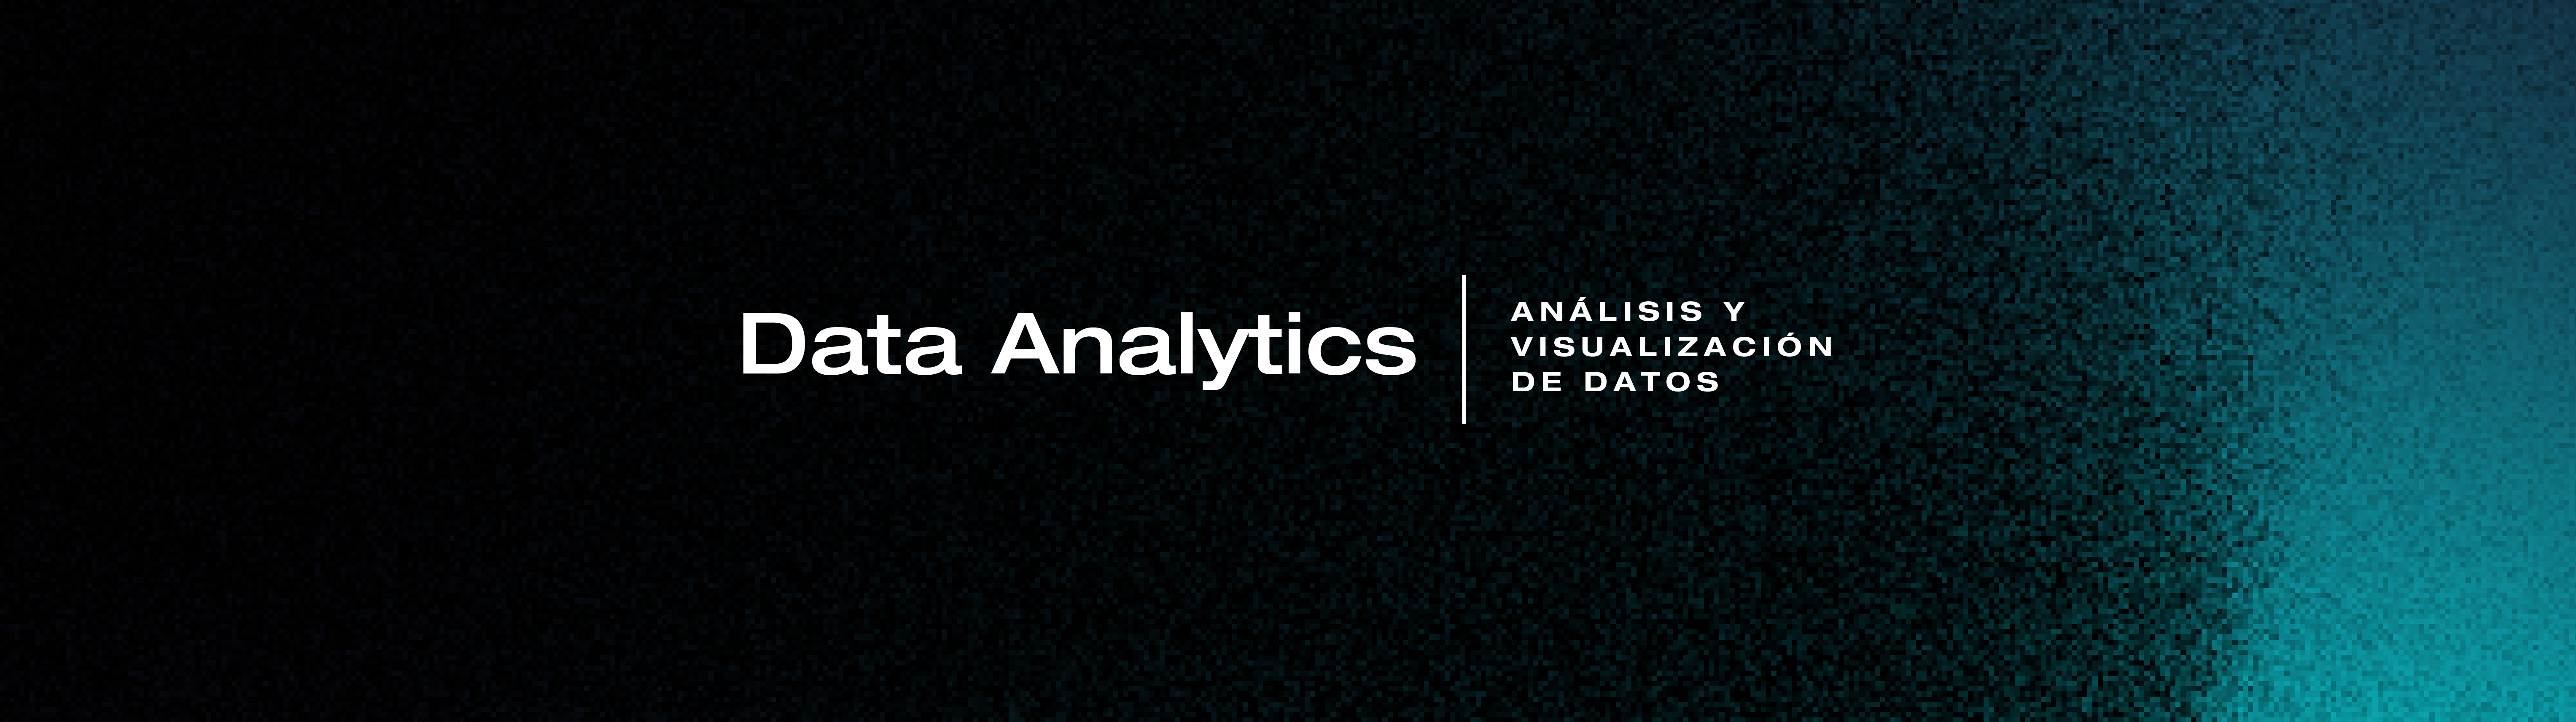

# **Reyes Miguel**- Tecnicatura en Desarrollo de Software

**Base de datos de acceso publica**

Sitio web:
- [https://datos.gob.ar/dataset/salud-vigilancia-enfermedades-por-virus-dengue-zika](https://https://datos.gob.ar/dataset/salud-vigilancia-enfermedades-por-virus-dengue-zika)-

- [repositorio](https://http://datos.salud.gob.ar/dataset/vigilancia-de-dengue-y-zika/archivo/bdd4e662-42cf-47ee-b7b3-bc14f5acae2d)

Ministerio de Salud. Secretaría de Promoción de la Salud, Prevención y Control de Riesgos. Subsecretaría de Prevención y Control de Enfermedades Comunicables e Inmunoprevenibles. Dirección Nacional de Epidemiología y Análisis de la Situación de Salud. Área de Vigilancia.

# Libreria complementaria usanfo Google Drive

In [ ]:
'''
# Se puede montar el dataset a tavés de google drive
from google.colab import auth
auth.authenticate_user()

from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials


gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link1 = 'https://drive.google.com/file/d/1r4CBTkZiId9v_zn-YqS_Q7RBx2_2jCz_/view?usp=sharing'


id = link1.split("/")[-2]


downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('dataset_dengue_salud_gral.csv')
'''


## Librerías

In [164]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import mode

sns.set_context('notebook', font_scale=1.2)

In [165]:
# Leer el archivo CSV especificando el delimitador ';'
url="https://github.com/migue212852/SistemaSalud/raw/refs/heads/main/dataset_dengue_salud_gral.csv"
df = pd.read_csv(url, encoding='latin1', sep=';')
# Mostrar las primeras filas del DataFrame
df.head()


,departamento_id,departamento_nombre,provincia_id,provincia_nombre,anio,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
0,0,*sin dato*,6,Buenos Aires,2018,11,Dengue,10,De 45 a 64 años,1.0
1,035,Avellaneda,6,Buenos Aires,2018,7,Dengue,8,De 20 a 24 años,1.0
2,035,Avellaneda,6,Buenos Aires,2018,7,Dengue,10,De 45 a 64 años,1.0
3,035,Avellaneda,6,Buenos Aires,2018,9,Dengue,6,De 10 a 14 años,1.0
4,035,Avellaneda,6,Buenos Aires,2018,9,Dengue,8,De 20 a 24 años,1.0


# Información genereal del dataset: "Dengue Salud"

### Abstract del Conjunto de Datos de Dengue en Argentina

Este conjunto de datos contiene información epidemiológica relacionada con los casos de dengue en Argentina desde el segundo semestre de 2018 y enero de 2025, organizada por variables geográficas, temporales, demográficas y de eventos sanitarios. Su propósito principal es proporcionar una base sólida para el análisis de la distribución y evolución del dengue en diferentes regiones del país, permitiendo identificar tendencias, patrones y factores de riesgo.

#### Descripción de las variables:
1. **`departamento_id` y `departamento_nombre`**: Identificadores y nombres de los departamentos donde se registraron los casos.
2. **`provincia_id` y `provincia_nombre`**: Identificadores y nombres de las provincias asociadas a los departamentos.
3. **`anio`**: Año en el que ocurrieron los casos registrados.
4. **`semanas_epidemiologicas`**: Semana del año en la que se registraron los casos, siguiendo el estándar epidemiológico.
5. **`evento_nombre`**: Nombre del evento de salud pública, en este caso, relacionado con casos de dengue.
6. **`grupo_edad_id` y `grupo_edad_desc`**: Identificadores y descripciones de los grupos etarios afectados.
7. **`cantidad_casos`**: Número de casos registrados para la combinación específica de las variables anteriores.

#### Origen del conjunto de datos:
El dataset fue recopilado y unificado de las bases de datos abiertos del ministerio de Salud, ([web oficial](https://datos.gob.ar/dataset/salud-vigilancia-enfermedades-por-virus-dengue-zika)) por entidades gubernamentales de salud pública en Argentina para monitorear y controlar los brotes de dengue en todo el país. Los datos provienen de reportes oficiales y registros sanitarios estandarizados.

#### Propósito:
El conjunto de datos es clave para:
- Monitorear el comportamiento del dengue a nivel temporal (año y semanas epidemiológicas).
- Analizar la distribución geográfica de los casos.
- Identificar grupos etarios más vulnerables y regiones con mayor incidencia.
- Desarrollar estrategias de prevención y control basadas en evidencia.

#### Información relevante:
Los datos reflejan una estructura jerárquica basada en provincias y departamentos, lo que permite un análisis granular. Además, incluyen una perspectiva temporal y demográfica que facilita estudios longitudinales y transversales del dengue en Argentina. Este conjunto de datos es útil para epidemiólogos, investigadores de salud pública y autoridades sanitarias en la toma de decisiones y la planificación de intervenciones.


## Exploración de los datos y validación

###Cantidad de filas y columnas:

In [166]:
print(f' Filas y Columnas del archivo Original{df.shape}')


 Filas y Columnas del archivo Original(67823, 10)


###Diferentes Variables

El siguiente códico muestra las varaibles en la etiqueta de las columnas del dataset.

In [167]:
variables = list(df.columns)
#for index, variable in enumerate(variables):
print(f'la cantidad de variables son {len(variables)}\n son las siguientes:\n {variables}')

la cantidad de variables son 10
 son las siguientes:
 ['departamento_id', 'departamento_nombre', 'provincia_id', 'provincia_nombre', 'anio', 'semanas_epidemiologicas', 'evento_nombre', 'grupo_edad_id', 'grupo_edad_desc', 'cantidad_casos']


### Información de las variables

In [168]:
print("Info DataSet Original")
df.info()

Info DataSet Original
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67823 entries, 0 to 67822
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   departamento_id          67823 non-null  object 
 1   departamento_nombre      67823 non-null  object 
 2   provincia_id             67823 non-null  int64  
 3   provincia_nombre         67823 non-null  object 
 4   anio                     67823 non-null  int64  
 5   semanas_epidemiologicas  67823 non-null  int64  
 6   evento_nombre            67823 non-null  object 
 7   grupo_edad_id            67821 non-null  object 
 8   grupo_edad_desc          67823 non-null  object 
 9   cantidad_casos           67822 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 5.2+ MB


In [169]:
# Obtener una muestra aleatoria de 30 filas
sample_df = df.sample(n=30, random_state=42)

# Imprimir la muestra en pantalla
display(sample_df)

,departamento_id,departamento_nombre,provincia_id,provincia_nombre,anio,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
45548,126,San Alberto,14,Córdoba,2024,18,Dengue,6,De 10 a 14 años,1.0
49602,21,Diamante,30,Entre Ríos,2024,9,Dengue,7,De 15 a 19 años,1.0
44519,42,General San Martín,14,Córdoba,2024,15,Dengue,6,De 10 a 14 años,45.0
33589,4,COMUNA 4,2,CABA,2024,9,Dengue,7,De 15 a 19 años,11.0
55254,7,Albardón,70,San Juan,2024,17,Dengue,7,De 15 a 19 años,1.0
58101,70,Pocito,70,San Juan,2024,10,Dengue,8,De 20 a 24 años,2.0
26458,14,Capital,14,Córdoba,2023,21,Dengue,5,De 5 a 9 años,4.0
24598,10,COMUNA 10,2,CABA,2023,19,Dengue,8,De 20 a 24 años,3.0
1097,54049,General Manuel Belgrano,54,Misiones,2019,15,Dengue,8,De 25 a 34 anos,1.0
50811,113,Villaguay,30,Entre Ríos,2024,18,Dengue,12,Mayores de 65 años,3.0


**OBSERVACION**

Luego de inspeccionar el formato de cada uno de los datos de las variables , vemos que la variable 'grupo_edad_id' debería ser tipo int, para poder realizar un análisis grafico. Se procede a curar estos datos.

## Descripción y curación de los datos

**Valores faltantes y blancos en Grupo_edad_id**

SE REALIZA LA CURACIÓN DE LOS DATOS EN GRUPO_EDAD_ID DONDE SE ASIGNA EL VALOR 13 A LAS EDADES EN BLANCO O SIN ESPECIFICAR

In [170]:
# Imprimir las filas con valores problemáticos
print("Valores originales de 'grupo_edad_id':")
print(df['grupo_edad_id'].unique())

# Reemplazar valores no numéricos con NaN
df['grupo_edad_id'] = pd.to_numeric(df['grupo_edad_id'], errors='coerce')

# Reemplazar NaN con un valor predeterminado 13 corresponde a EDAD SIN ESPECIFICAR)
df['grupo_edad_id'] = df['grupo_edad_id'].fillna(13)

# Convertir la columna a tipo entero
df['grupo_edad_id'] = df['grupo_edad_id'].astype(int)

# Imprimir el resultado final
print("\nDespués de la corrección:")
print(df['grupo_edad_id'].unique())


Valores originales de 'grupo_edad_id':
['10' '8' '6' '9' '11' '5' '4' '7' '2' '1' '12' '3' nan '-' '0' '13' 11 12
 2 3 4 5 6 7 8 9 10 13 1]

Después de la corrección:
[10  8  6  9 11  5  4  7  2  1 12  3 13  0]


El siguiente detalle muestras las variables numéricas con sus tendencias estadisticas descriptivas en formato float con 2 decimales.

In [171]:
# Aplicar la función describe al DataFrame
summary = df.describe()

# Redondear los valores a 2 decimales
summary_rounded = summary.round(2)

# Mostrar el resultado
summary_rounded

,provincia_id,anio,semanas_epidemiologicas,grupo_edad_id,cantidad_casos
count,67823.00,67823.00,67823.00,67823.00,67822.00
mean,39.00,2022.87,15.46,8.11,11.73
std,31.01,1.61,9.11,2.59,44.06
min,0.00,2018.00,1.00,0.00,1.00
25%,10.00,2023.00,10.00,6.00,1.00
50%,30.00,2024.00,14.00,8.00,2.00
75%,66.00,2024.00,18.00,10.00,7.00
max,99.00,2025.00,53.00,13.00,2349.00


El detalle anterior de los valores centrales de tendencias lo podemos observar graficamente en las graficas de Boxplot de las variables numéricas.

Text(0.5, 1.0, 'Boxplot de variables numéricas')

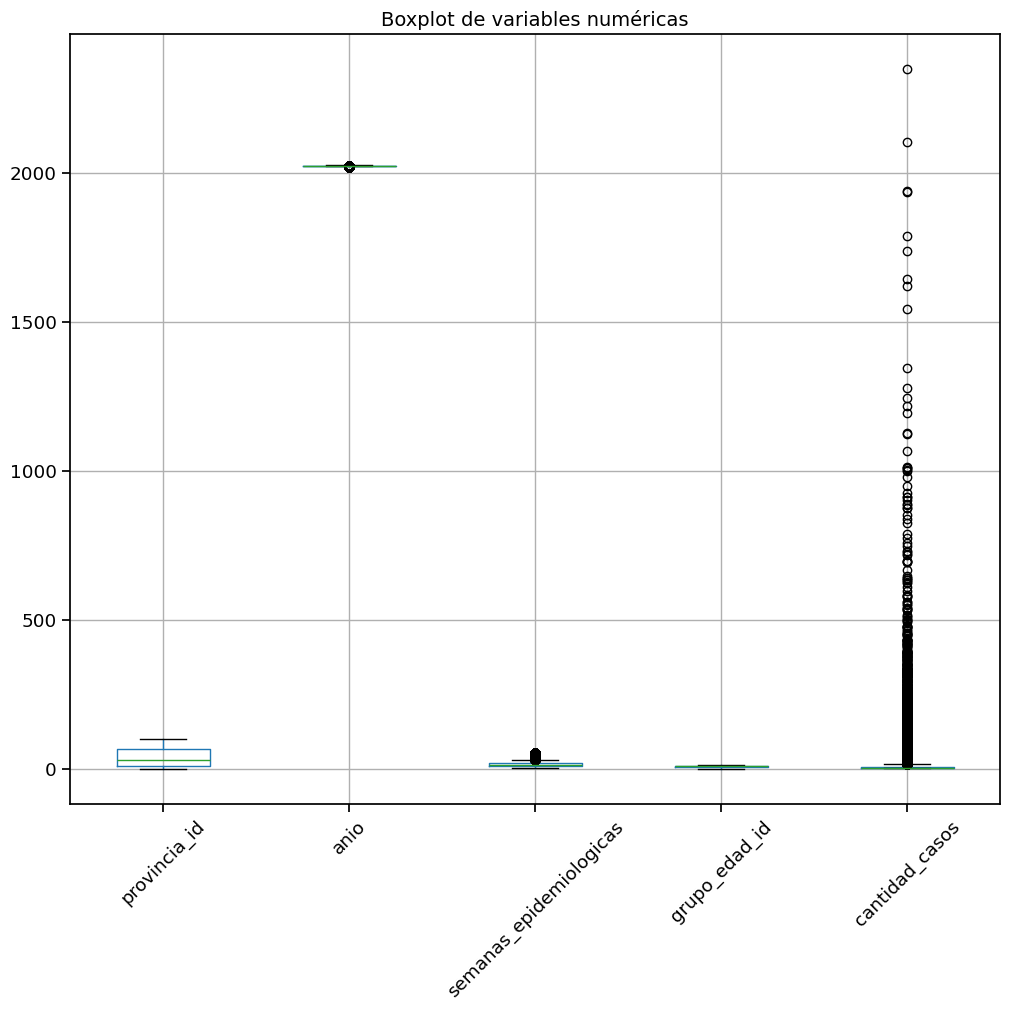

In [172]:
#creación de boxplot
df.boxplot(figsize=(12, 10), rot=45)

# Personalizar la gráfica
plt.title('Boxplot de variables numéricas', fontsize=14)


La gráfica anterior nos permite evaluar de manera rapida la variabilidad y la certeza de los datos, como así también identificar anomalias. En este último punto podemos considerar la variable 'cantidad_casos', donde vemos que tiene datos outlier o atipicos. Esto lo analizaré más adelante.

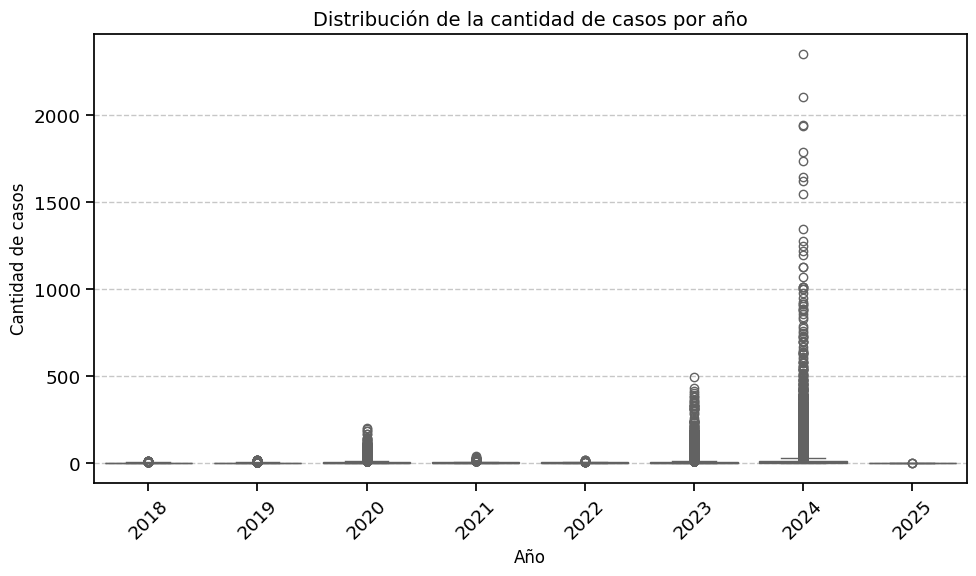

In [173]:
# Crear el boxplot comparativo
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='anio', y='cantidad_casos', palette="Set3")

# Personalizar la gráfica
plt.title('Distribución de la cantidad de casos por año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de casos', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Este análisis permite identificar que aquellos años que presentan gran variabilidad en la cantidad_casos, o valores extremos atípicos, seria un **indicador de PANDEMIA**. Esto intentaremos plasmarlo en alguna relacion funcional entre las variables.


## Limpieza de los Datos


### Datos Nulos o Faltantes

Con el siguiente código podemos observar que no hay practicamente valores faltantes, aunque pueden haber valores con datos nulos o 'blancos'.

In [174]:
valores_nulos_por_columna = df.isnull().sum()
print(f"cantidad de valores nulos: \n\n{valores_nulos_por_columna}")

cantidad de valores nulos: 

departamento_id            0
departamento_nombre        0
provincia_id               0
provincia_nombre           0
anio                       0
semanas_epidemiologicas    0
evento_nombre              0
grupo_edad_id              0
grupo_edad_desc            0
cantidad_casos             1
dtype: int64


In [175]:
df[df['cantidad_casos'].isnull()]

,departamento_id,departamento_nombre,provincia_id,provincia_nombre,anio,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
578,105,LOS ANDES,66,Salta,2018,11,Dengue,6,De 10 a 14 años,NaN


Dado que el valor anterior en cantidad_casos es faltante , le asignaremos el valor minimo, es decir 1.

In [176]:
df.loc[df['cantidad_casos'].isnull(), 'cantidad_casos'] = 1

In [177]:
valores_nulos_por_columna = df.isnull().sum()
print(f"cantidad de valores nulos: \n\n{valores_nulos_por_columna}")

cantidad de valores nulos: 

departamento_id            0
departamento_nombre        0
provincia_id               0
provincia_nombre           0
anio                       0
semanas_epidemiologicas    0
evento_nombre              0
grupo_edad_id              0
grupo_edad_desc            0
cantidad_casos             0
dtype: int64


Esto nos indica que no hay valores faltantes, pero aún así podemos tener valores duplicados y valores nulos o con etiquetas desconocidas. Procederé a analizar esos casos.

### Filas repetidas

In [178]:
# Obtener las posiciones (índices) de los registros duplicados
posiciones_duplicados = df.index[df.duplicated()].tolist()

# Mostrar las posiciones de los duplicados
print("Posiciones de los registros duplicados:")
print(posiciones_duplicados)
print(f'la cantidad de duplicados son :{len(posiciones_duplicados)}')


Posiciones de los registros duplicados:
[756, 874, 1064, 1075, 1432, 1523, 1571, 1589, 1860, 11896, 11929, 12215, 12351, 12410, 12567, 13963, 13967, 13969, 13971, 14120, 17081, 17873, 18513, 21575, 22482, 25066, 27368, 31487, 32189, 32529, 33012, 33138, 33459, 34155, 41629, 41792, 43727, 63299, 63762]
la cantidad de duplicados son :39


La siguient linea muestra los valores repetidos, de manera de identificar la validez del resultado

In [179]:
filas_coincidentes = df.where((df == df.iloc[756])|(df == df.iloc[ 874])).dropna(how='any')
#filas_coincidentes = df.where((df == df.iloc[756])|(df == df.iloc[ 874])).dropna()
filas_coincidentes

,departamento_id,departamento_nombre,provincia_id,provincia_nombre,anio,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
753,22063,General Guemes,22.0,Chaco,2019.0,15.0,Dengue,7.0,De 20 a 24 anos,1.0
756,22063,General Guemes,22.0,Chaco,2019.0,15.0,Dengue,7.0,De 20 a 24 anos,1.0
859,38035,Ledesma,38.0,Jujuy,2019.0,23.0,Dengue,8.0,De 25 a 34 anos,1.0
874,38035,Ledesma,38.0,Jujuy,2019.0,23.0,Dengue,8.0,De 25 a 34 anos,1.0


Se muestran los valores repetidos , se eliminan los duplicadas y se muestra el resultado luego de la depuración.

In [180]:
# Mostrar registros duplicados
duplicados = df[df.duplicated()]
print("Registros duplicados encontrados:")
display(duplicados)

# Eliminar los registros duplicados
df_up= df.drop_duplicates()

# Mostrar el DataFrame actualizado
print("\nDataFrame después de eliminar duplicados:")
display(df_up)


Registros duplicados encontrados:


,departamento_id,departamento_nombre,provincia_id,provincia_nombre,anio,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
756,22063,General Guemes,22,Chaco,2019,15,Dengue,7,De 20 a 24 anos,1.0
874,38035,Ledesma,38,Jujuy,2019,23,Dengue,8,De 25 a 34 anos,1.0
1064,54042,Eldorado,54,Misiones,2019,20,Dengue,4,De 5 a 9 anos,1.0
1075,54049,General Manuel Belgrano,54,Misiones,2019,21,Dengue,5,De 10 a 14 anos,1.0
1432,66056,Grl. Jose de San Martin,66,Salta,2019,22,Dengue,8,De 25 a 34 anos,1.0
1523,66126,Oran,66,Salta,2019,14,Dengue,6,De 15 a 19 anos,2.0
1571,66126,Oran,66,Salta,2019,14,Dengue,9,De 35 a 44 anos,2.0
1589,66126,Oran,66,Salta,2019,15,Dengue,10,De 45 a 65 anos,1.0
1860,82084,Rosario,82,Santa Fe,2019,15,Dengue,5,De 10 a 14 anos,1.0
11896,66007,Anta,66,Salta,2020,12,Dengue,11,Mayores de 65 anos,1.0



DataFrame después de eliminar duplicados:


,departamento_id,departamento_nombre,provincia_id,provincia_nombre,anio,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
0,0,*sin dato*,6,Buenos Aires,2018,11,Dengue,10,De 45 a 64 años,1.0
1,035,Avellaneda,6,Buenos Aires,2018,7,Dengue,8,De 20 a 24 años,1.0
2,035,Avellaneda,6,Buenos Aires,2018,7,Dengue,10,De 45 a 64 años,1.0
3,035,Avellaneda,6,Buenos Aires,2018,9,Dengue,6,De 10 a 14 años,1.0
4,035,Avellaneda,6,Buenos Aires,2018,9,Dengue,8,De 20 a 24 años,1.0
...,...,...,...,...,...,...,...,...,...,...
67818,42,Pilagás,34,Formosa,2025,1,Dengue,12,Mayores de 65 años,1.0
67819,42,Pilagás,34,Formosa,2025,1,Dengue,9,De 25 a 34 años,1.0
67820,14,Formosa,34,Formosa,2025,1,Dengue,6,De 10 a 14 años,2.0
67821,35,Patiño,34,Formosa,2025,1,Dengue,8,De 20 a 24 años,2.0


### Curación de valores DESCONOCIDOS

Aceptaremos que los departamentos_nombre tengan asignado el valore Desconocido (con el correspondiente departamento_id =999), pero eliminaremos los registros con las variables provincia_nombre=DESCONOCIDO.

In [181]:
# Obtener valores únicos y ordenarlos alfabéticamente
dpto = np.sort(df_up['departamento_nombre'].unique())

# Mostrar el array redimensionado
print(dpto.reshape(67, 7))

[['#¡VALOR!' '(en blanco)' '*sin dato*' '++++++++++++' '12 de Octubre'
  '1a de Mayo' '1º de Mayo']
 ['2 De Abril' '2 de Abril' '2007' '25 de Mayo' '9 de Julio'
  'Adolfo Alsina' 'Adolfo Gonzales Chaves']
 ['Aguirre' 'Albardón' 'Alberdi' 'Alberti' 'Almirante Brown' 'Aluminé'
  'Ambato']
 ['Ancasti' 'Andalgalá' 'Angaco' 'Anta' 'Antártida Argentina' 'Apostoles'
  'Apóstoles']
 ['Arauco' 'Arrecifes' 'Atamisqui' 'Atreucó' 'Avellaneda' 'Ayacucho'
  'Azul']
 ['Añelo' 'Bahía Blanca' 'Balcarce' 'Banda' 'Baradero' 'Bariloche'
  'Belgrano']
 ['Bella Vista' 'Belén' 'Benito Juárez' 'Berazategui' 'Berisso' 'Bermejo'
  'Berón de Astrada']
 ['Biedma' 'Bolívar' 'Bragado' 'Brandsen' 'Burruyacú' 'CABA' 'CHACABUCO']
 ['COMUNA 1' 'COMUNA 10' 'COMUNA 11' 'COMUNA 12' 'COMUNA 13' 'COMUNA 14'
  'COMUNA 15']
 ['COMUNA 2' 'COMUNA 3' 'COMUNA 4' 'COMUNA 5' 'COMUNA 6' 'COMUNA 7'
  'COMUNA 8']
 ['COMUNA 9' 'Cachi' 'Cafayate' 'Cainguás' 'Calamuchita' 'Calingasta'
  'Campana']
 ['Candelaria' 'Capayán' 'Capital' 'Capi

Podemos observar que los valores desconocidos son : '#¡VALOR!',  '(en blanco)', '*sin dato*' ,'++++++++++++' y 'desconocido' deberán ser unificados para generar coherencia con la información.

In [182]:
df_delete=df_up[(df_up['departamento_nombre']=='desconocido')|(df_up['departamento_nombre']=='*sin dato*')|(df_up['departamento_id']=='(en blanco)')|(df_up['departamento_nombre']=='#¡VALOR!')|(df_up['departamento_nombre']== '++++++++++++')|(df_up['departamento_nombre']=='(en blanco)')]
print(df_delete.shape)
display(df_delete)
df_up.loc[df_up.index.isin(df_delete.index), 'departamento_nombre'] = 'desconocido'
df_up.loc[df_up.index.isin(df_delete.index), 'departamento_id'] = 999

(1120, 10)


,departamento_id,departamento_nombre,provincia_id,provincia_nombre,anio,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
0,0,*sin dato*,6,Buenos Aires,2018,11,Dengue,10,De 45 a 64 años,1.0
117,0,*sin dato*,2,CABA,2018,13,Dengue,10,De 45 a 64 años,1.0
118,0,*sin dato*,2,CABA,2018,14,Dengue,10,De 35 a 44 años,1.0
119,0,*sin dato*,2,CABA,2018,15,Dengue,10,De 35 a 44 años,1.0
120,0,*sin dato*,2,CABA,2018,18,Dengue,9,De 25 a 34 años,1.0
...,...,...,...,...,...,...,...,...,...,...
67670,999,desconocido,99,desconocida,2024,51,Dengue,6,De 10 a 14 años,1.0
67688,999,desconocido,99,desconocida,2024,49,Dengue,10,De 35 a 44 años,1.0
67718,999,desconocido,99,desconocida,2024,37,Dengue,2,Posneonato (29 hasta 365 dÍas),1.0
67722,999,desconocido,34,Formosa,2024,35,Dengue,6,De 10 a 14 años,1.0


In [183]:
# Obtener valores únicos y ordenarlos alfabéticamente para la varaible provincia_nombre
print(np.sort(df_up['provincia_nombre'].unique()))

['(en blanco)' '*sin dato*' 'Buenos Aires' 'CABA' 'Catamarca' 'Chaco'
 'Chubut' 'Corrientes' 'Córdoba' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa'
 'La Rioja' 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan'
 'San Luis' 'Santa Cruz' 'Santa Fe' 'Santiago del Estero'
 'Tierra del Fuego' 'Tucumán' 'desconocida']


In [184]:
print('Datos con valores blancos en departamento_nombre')
df_up[(df_up['provincia_nombre']=='(en blanco)')|(df_up['provincia_nombre']=='desconocida')|(df_up['provincia_nombre']=='*sin dato*')]

Datos con valores blancos en departamento_nombre


,departamento_id,departamento_nombre,provincia_id,provincia_nombre,anio,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
1933,999,desconocido,0,*sin dato*,2020,10,Dengue,8,De 25 a 34 anos,1.0
1934,999,desconocido,0,*sin dato*,2020,15,Dengue,5,De 10 a 14 anos,1.0
11799,999,desconocido,0,(en blanco),2020,6,Dengue,13,Sin Especificar,1.0
11800,999,desconocido,0,(en blanco),2020,8,Dengue,9,De 35 a 44 anos,1.0
11801,999,desconocido,0,(en blanco),2020,10,Dengue,13,Sin Especificar,1.0
...,...,...,...,...,...,...,...,...,...,...
67642,999,desconocido,99,desconocida,2024,51,Dengue,11,De 45 a 65 años,1.0
67670,999,desconocido,99,desconocida,2024,51,Dengue,6,De 10 a 14 años,1.0
67688,999,desconocido,99,desconocida,2024,49,Dengue,10,De 35 a 44 años,1.0
67718,999,desconocido,99,desconocida,2024,37,Dengue,2,Posneonato (29 hasta 365 dÍas),1.0


In [185]:
#Redefinimos el dataset delete, los registros con variables blancas en provincia_nombre
df_delete = df_up[(df_up['provincia_nombre']=='(en blanco)')|(df_up['provincia_nombre']=='desconocida')|(df_up['provincia_nombre']=='*sin dato*')]

print(df_delete.shape)
display(df_delete)

(508, 10)


,departamento_id,departamento_nombre,provincia_id,provincia_nombre,anio,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
1933,999,desconocido,0,*sin dato*,2020,10,Dengue,8,De 25 a 34 anos,1.0
1934,999,desconocido,0,*sin dato*,2020,15,Dengue,5,De 10 a 14 anos,1.0
11799,999,desconocido,0,(en blanco),2020,6,Dengue,13,Sin Especificar,1.0
11800,999,desconocido,0,(en blanco),2020,8,Dengue,9,De 35 a 44 anos,1.0
11801,999,desconocido,0,(en blanco),2020,10,Dengue,13,Sin Especificar,1.0
...,...,...,...,...,...,...,...,...,...,...
67642,999,desconocido,99,desconocida,2024,51,Dengue,11,De 45 a 65 años,1.0
67670,999,desconocido,99,desconocida,2024,51,Dengue,6,De 10 a 14 años,1.0
67688,999,desconocido,99,desconocida,2024,49,Dengue,10,De 35 a 44 años,1.0
67718,999,desconocido,99,desconocida,2024,37,Dengue,2,Posneonato (29 hasta 365 dÍas),1.0


In [186]:
# Realizar un anti-merge para filtrar los registros que no están en `df_subgrupo`
df_filtrado = df_up.merge(df_delete, how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)

# Mostrar el DataFrame filtrado
print(f"dimension del DataFrame antes de eliminar  registros : {df_up.shape}")
print(f"dimension del DataFrame después de eliminar los registros del subgrupo Delete-faltanes: {df_filtrado.shape}")



dimension del DataFrame antes de eliminar  registros : (67784, 10)
dimension del DataFrame después de eliminar los registros del subgrupo Delete-faltanes: (67276, 10)


Verificación de los valores en la variable provincia_nombre

In [187]:
print(np.sort(df_filtrado['provincia_nombre'].unique()))

['Buenos Aires' 'CABA' 'Catamarca' 'Chaco' 'Chubut' 'Corrientes' 'Córdoba'
 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja' 'Mendoza' 'Misiones'
 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis' 'Santa Cruz'
 'Santa Fe' 'Santiago del Estero' 'Tierra del Fuego' 'Tucumán']


## Análisis de los valores de las diferentes Variables

Nuestra variables objetivos serán los **anios**, y **cantidad_casos**, con relación a las restantes. Exploraremos y analizaremos los datos asociados con nuestra variable objetivo.

Procedere a filtrar las variables para evaluar su comportamiento segun diferentes features, para luego poder realizar una grafica y así identificar regularidad y relaciones entre las variables.

In [188]:
# Tabla cruzada entre cantidad de casos y años
tabla_anios = df_filtrado.pivot_table(index='anio', values='cantidad_casos', aggfunc='sum')

# Tabla cruzada entre cantidad de casos y provincias
tabla_provincias = df_filtrado.pivot_table(index='provincia_nombre', values='cantidad_casos', aggfunc='sum')

# Mostrar las tablas cruzadas
print("Tabla Cruzada: Casos por Año")
print(tabla_anios)
print("\nTabla Cruzada: Casos por Provincia")
print(tabla_provincias)

Tabla Cruzada: Casos por Año
      cantidad_casos
anio                
2018          1202.0
2019          2783.0
2020         58752.0
2021          3845.0
2022           801.0
2023        146400.0
2024        554343.0
2025            17.0

Tabla Cruzada: Casos por Provincia
                     cantidad_casos
provincia_nombre                   
Buenos Aires               126632.0
CABA                        44667.0
Catamarca                   12263.0
Chaco                       43903.0
Chubut                         75.0
Corrientes                  16460.0
Córdoba                    115648.0
Entre Ríos                  20727.0
Formosa                     21079.0
Jujuy                       25669.0
La Pampa                      589.0
La Rioja                    14065.0
Mendoza                      4846.0
Misiones                    25603.0
Neuquén                       221.0
Río Negro                     116.0
Salta                       50382.0
San Juan                     2265.0
San L

En función de los datos presentados arriba, podemos graficar y visualizar esos datos de manera comparativa del comportamiento de estas enfermedades diferenciando años y ubicaciones geográficas.


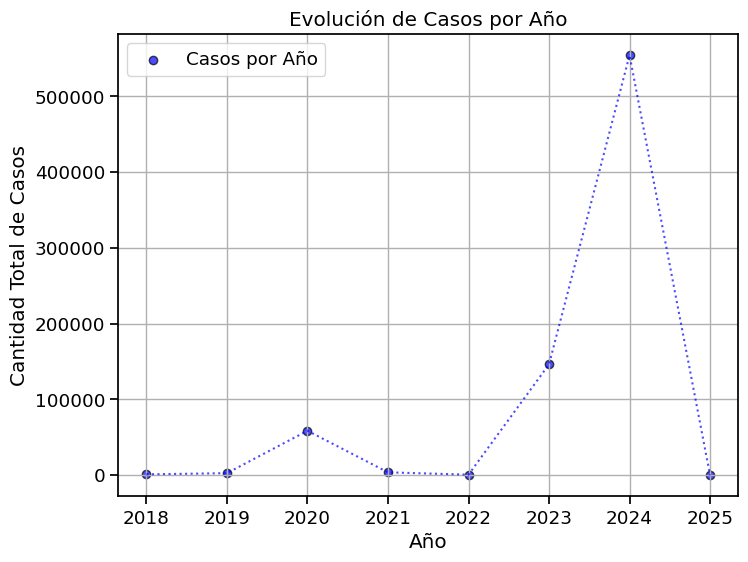

In [189]:
# Agrupar por 'anio' y sumar los valores de 'cantidad_casos'
data_grouped = df_filtrado.groupby('anio')['cantidad_casos'].sum()

# Extraer los valores para el scatter plot
x = data_grouped.index  # Valores únicos de 'anio'
y = data_grouped.values  # Suma total de 'cantidad_casos'

# Graficar el scatter plot
plt.figure(figsize=(8, 6))

# Graficar los puntos (scatter plot)
plt.scatter(x, y, color='blue', alpha=0.7, edgecolors='black', label="Casos por Año")

# Agregar línea punteada que une los puntos
plt.plot(x, y, linestyle='dotted', color='blue', alpha=0.7)

plt.title('Evolución de Casos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad Total de Casos')
plt.grid(True)
plt.legend()

plt.show()

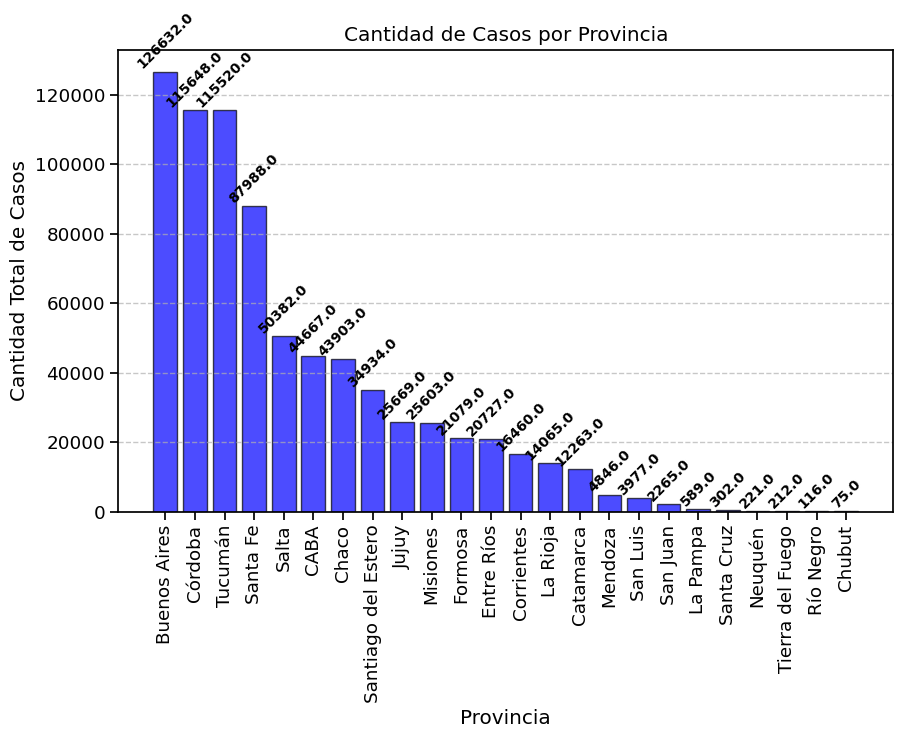

In [190]:
# Agrupar por 'provincia_nombre' y sumar los valores de 'cantidad_casos'
data_grouped = df_filtrado.groupby('provincia_nombre')['cantidad_casos'].sum()

# Ordenar de mayor a menor
data_grouped = data_grouped.sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(data_grouped.index, data_grouped.values, color='blue', alpha=0.7, edgecolor='black')

# Agregar valores encima de las barras con inclinación de 45 grados
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2,  # Posición en X (centro de la barra)
             bar.get_height(),  # Posición en Y (altura de la barra)
             f"{bar.get_height()}",  # Texto a mostrar (valor)
             ha='center',  # Alineación horizontal
             va='bottom',  # Alineación vertical
             fontsize=10,
             fontweight='bold',
             rotation=45)  # Rotación de 45 grados

# Configuración del gráfico
plt.title('Cantidad de Casos por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad Total de Casos')
plt.xticks(rotation=90)  # Rotar etiquetas del eje X
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Líneas de referencia horizontales
plt.show()


**OBSERVACIÓN:** La siguiente grafica NO APORTA INFORMACIÓN RELEVANTE, dado que contabiliza la frecuencia en que se repite cada provincia, sin considerar que en varios registros la provincia figura una vez, y corresponde con cantidad_casos superior a 2. Es decir LA GRAFICA SIGUIENTE NO REFLEJA DE MANERA FIEL EL COMPORTAMIENTO DE LA CANTIDAD_CASOS POR PROVINCIA. Mientras que la primera gráfica si lo hace de manera correcta.

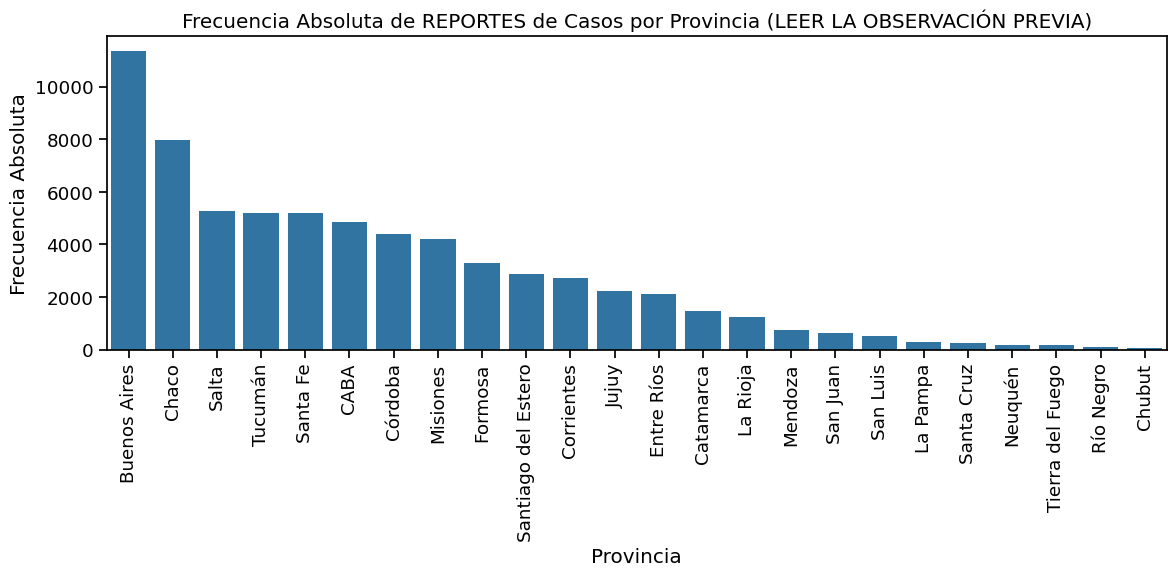

In [191]:
# Crear un gráfico de barras ordenado por frecuencia
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtrado, x='provincia_nombre', order=df_filtrado['provincia_nombre'].value_counts().index)

# Rotar las etiquetas del eje X para mayor claridad
plt.xticks(rotation=90)

# Agregar título y etiquetas a los ejes
plt.title('Frecuencia Absoluta de REPORTES de Casos por Provincia (LEER LA OBSERVACIÓN PREVIA)')
plt.xlabel('Provincia')
plt.ylabel('Frecuencia Absoluta')

# Mostrar el gráfico
plt.tight_layout()  # Ajustar los márgenes para evitar solapamientos
plt.show()

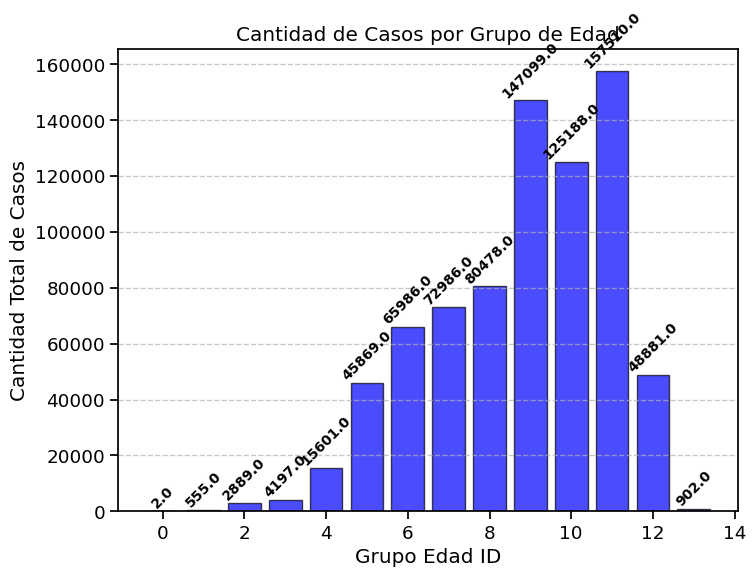

In [192]:
# Filtrar y agrupar por 'grupo_edad_id', sumando los valores de 'cantidad_casos'
data_grouped = df_filtrado[df_filtrado['grupo_edad_id'] <= 13].groupby('grupo_edad_id')['cantidad_casos'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(data_grouped.index, data_grouped.values, color='blue', alpha=0.7, edgecolor='black')

# Agregar etiquetas de los valores sobre las barras con inclinación de 45 grados
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2,  # Posición en X (centro de la barra)
             bar.get_height(),  # Posición en Y (altura de la barra)
             f"{bar.get_height()}",  # Texto a mostrar (valor)
             ha='center',  # Alineación horizontal
             va='bottom',  # Alineación vertical
             fontsize=10,
             fontweight='bold',
             rotation=45)  # Rotación de 45 grados

# Configuración del gráfico
plt.title('Cantidad de Casos por Grupo de Edad')
plt.xlabel('Grupo Edad ID')
plt.ylabel('Cantidad Total de Casos')
plt.xticks(rotation=0)  # Mantener etiquetas del eje X sin rotación
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Líneas de referencia horizontales
plt.show()

### REGRESIÓN Y APROXIMACIÓN FUNCIONAL
De la gráfica anterior, podemos observar que existe cierta tendencia o relación entre grupo_edad_id y cantidad_casos. Para ello procederemos a considerar solo el rengo de edades hasta 65 años es decir grupo_edad_id = 11.

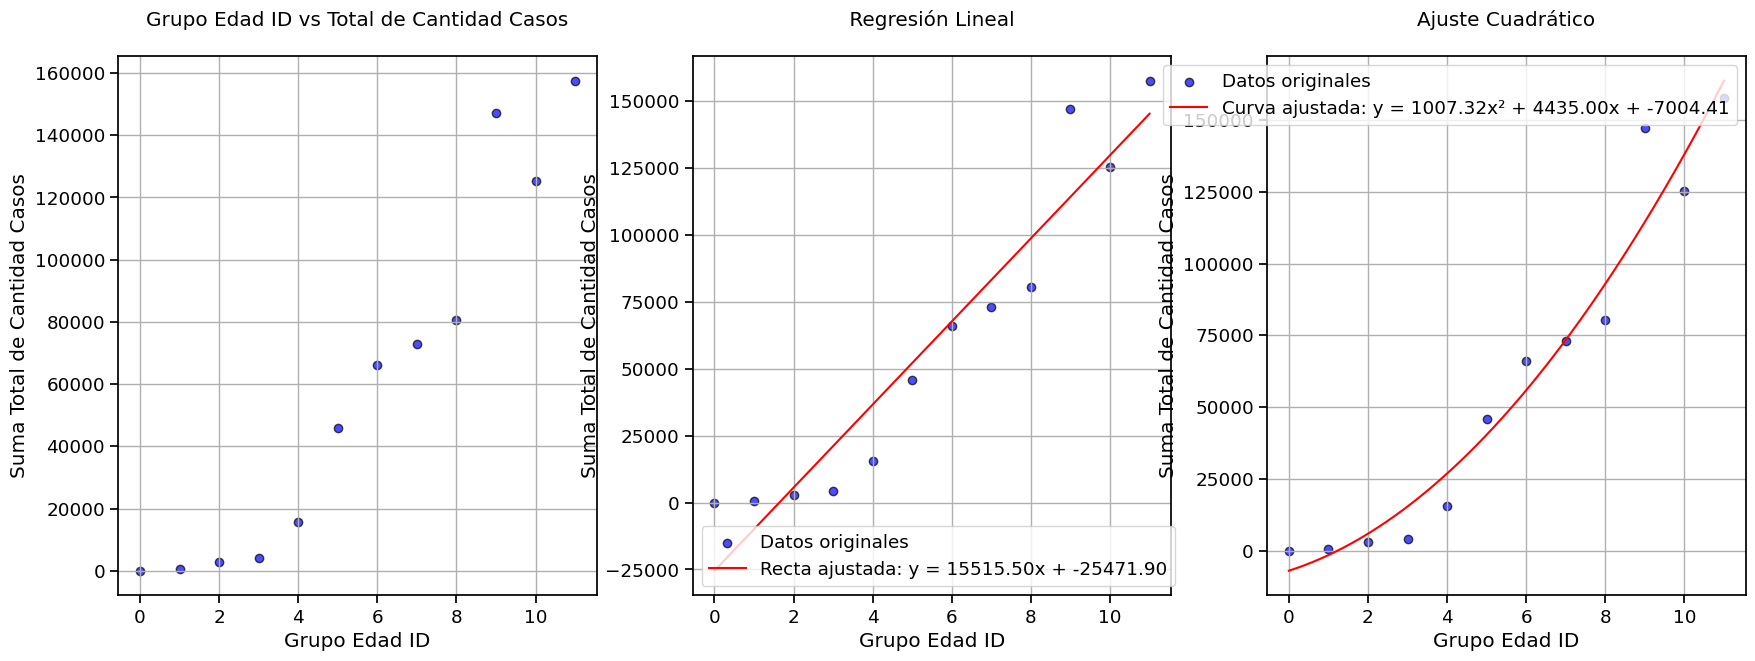

In [193]:
# Agrupar por 'grupo_edad_id' y sumar los valores de 'cantidad_casos'
data_grouped = df_filtrado[df_filtrado['grupo_edad_id']<=11].groupby('grupo_edad_id')['cantidad_casos'].sum()

# Extraer los valores para el scatter plot
x = data_grouped.index  # Valores únicos de 'grupo_edad_id'
y = data_grouped.values  # Suma total de 'cantidad_casos' por grupo_edad_id

plt.subplots(1, 3, figsize=(21, 7))


plt.subplot(1,3,1)
# Graficar el scatter plot
plt.scatter(x, y, color='blue', alpha=0.7, edgecolors='black')
plt.title('Grupo Edad ID vs Total de Cantidad Casos\n')
plt.xlabel('Grupo Edad ID')
plt.ylabel('Suma Total de Cantidad Casos')
plt.grid(True)


plt.subplot(1,3,2)
# Realizar regresión lineal
coef = np.polyfit(x, y, 1)  # Ajustar una línea recta (grado 1)
poly1d_fn = np.poly1d(coef)  # Crear la función de la recta ajustada
# Graficar los datos originales (scatter plot)
plt.scatter(x, y, color='blue', alpha=0.7, edgecolors='black', label='Datos originales')
# Graficar la recta ajustada
plt.plot(x, poly1d_fn(x), color='red', label=f'Recta ajustada: y = {coef[0]:.2f}x + {coef[1]:.2f}')
# Añadir etiquetas, título y leyenda
plt.title(' Regresión Lineal \n')
plt.xlabel('Grupo Edad ID')
plt.ylabel('Suma Total de Cantidad Casos')
plt.legend()
plt.grid(True)

plt.subplot(1,3,3)
# Realizar ajuste cuadrático
coef = np.polyfit(x, y, 2)  # Ajustar un polinomio de grado 2
poly2d_fn = np.poly1d(coef)  # Crear la función de la curva ajustada
# Graficar los datos originales (scatter plot)
plt.scatter(x, y, color='blue', alpha=0.7, edgecolors='black', label='Datos originales')
# Generar valores para la curva ajustada
x_curve = np.linspace(min(x), max(x), 500)  # Valores uniformemente espaciados en el rango de x
y_curve = poly2d_fn(x_curve)  # Calcular los valores de y usando el polinomio ajustado
# Graficar la curva ajustada
plt.plot(x_curve, y_curve, color='red', label=f'Curva ajustada: y = {coef[0]:.2f}x² + {coef[1]:.2f}x + {coef[2]:.2f}')
# Añadir etiquetas, título y leyenda
plt.title('Ajuste Cuadrático\n')
plt.xlabel('Grupo Edad ID')
plt.ylabel('Suma Total de Cantidad Casos')
plt.legend()
plt.grid(True)

plt.show()


### Observación:
De las gráficas arriba , podemos verificar que la curva que mejor ajusta a los datos es una función cuadrática. Esto nos permite predecir de acuerdo al indicador de la edad ( es decir, de acuerdo al rango de edad que corresponde), cuál será la cantidad aproximada de casos registrados. Pero esto es precisamente una PROBABILIDAD. POR LO CUAL PROCEDERÉ A NORMALIZAR LOS DATOS Y GRAFICAR UNA PROBABILIDAD DE ACUERDO AL GRUPO DE EDADES.

Por otro lado también realizaré el ajuste lineal y cuadrático para encontrar un patrón o indicador que relacione la edad con la tendencia de probabilidad de contagio de la enfermedad.

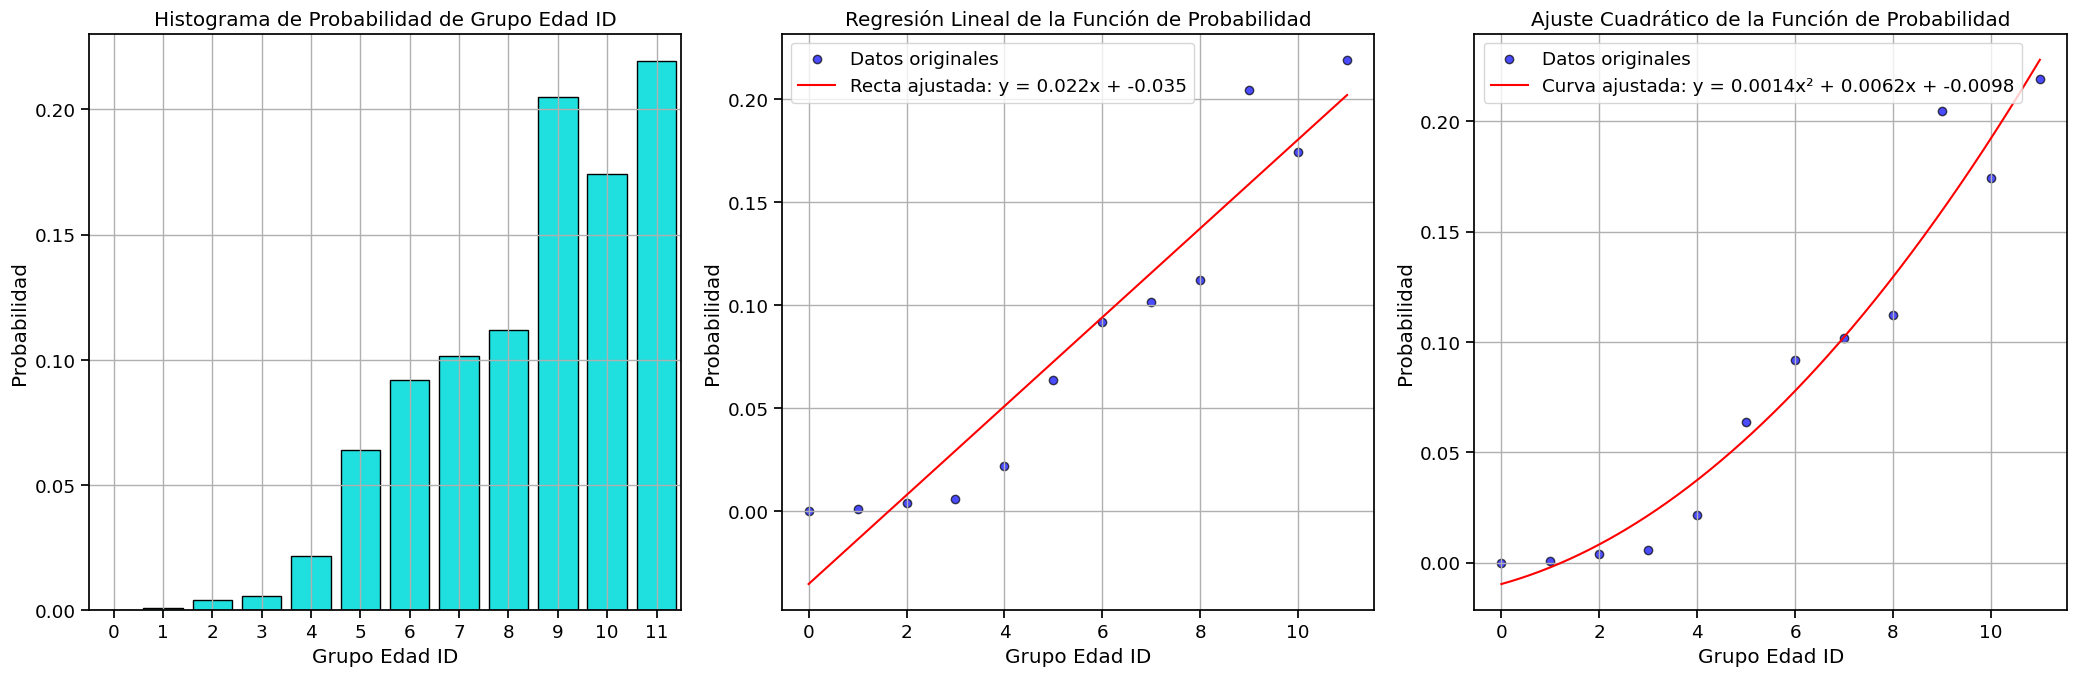

In [194]:
# Agrupar por 'grupo_edad_id' y sumar los valores de 'cantidad_casos'
data_grouped = df_filtrado[df_filtrado['grupo_edad_id'] <= 11].groupby('grupo_edad_id')['cantidad_casos'].sum()

# Extraer los valores para la gráfica
x = data_grouped.index  # Valores únicos de 'grupo_edad_id'
y = data_grouped.values  # Suma total de 'cantidad_casos' por grupo_edad_id

# Normalizar los valores para convertirlos en una función de probabilidad
y_prob = y / y.sum()

# Crear la figura con 3 subgráficos
plt.figure(figsize=(21, 7))

# Subplot 1: Histograma de la variable discreta 'grupo_edad_id'
plt.subplot(1, 3, 1)
sns.barplot(x=x, y=y_prob, color='cyan', edgecolor='black')
plt.title('Histograma de Probabilidad de Grupo Edad ID')
plt.xlabel('Grupo Edad ID')
plt.ylabel('Probabilidad')
plt.grid(True)

# Subplot 2: Regresión Lineal
plt.subplot(1, 3, 2)
coef = np.polyfit(x, y_prob, 1)  # Ajustar una línea recta (grado 1)
poly1d_fn = np.poly1d(coef)  # Crear la función de la recta ajustada
plt.scatter(x, y_prob, color='blue', alpha=0.7, edgecolors='black', label='Datos originales')
plt.plot(x, poly1d_fn(x), color='red', label=f'Recta ajustada: y = {coef[0]:.3f}x + {coef[1]:.3f}')
plt.title('Regresión Lineal de la Función de Probabilidad')
plt.xlabel('Grupo Edad ID')
plt.ylabel('Probabilidad')
plt.legend()
plt.grid(True)

# Subplot 3: Ajuste Cuadrático
plt.subplot(1, 3, 3)
coef = np.polyfit(x, y_prob, 2)  # Ajustar un polinomio de grado 2
poly2d_fn = np.poly1d(coef)  # Crear la función de la curva ajustada
x_curve = np.linspace(min(x), max(x), 500)  # Valores uniformemente espaciados
y_curve = poly2d_fn(x_curve)  # Calcular valores de y usando el polinomio ajustado
plt.scatter(x, y_prob, color='blue', alpha=0.7, edgecolors='black', label='Datos originales')
plt.plot(x_curve, y_curve, color='red', label=f'Curva ajustada: y = {coef[0]:.4f}x² + {coef[1]:.4f}x + {coef[2]:.4f}')
plt.title('Ajuste Cuadrático de la Función de Probabilidad')
plt.xlabel('Grupo Edad ID')
plt.ylabel('Probabilidad')
plt.legend()
plt.grid(True)

# Mostrar todas las gráficas
plt.tight_layout()
plt.show()


### Tendencia segun la Epoca del Año
Para poder analizar la relación entre la enfermedad y la estación del año, se procederá a analizar el comportamiento del nivel de casos segun las semanas epidemiológicas registradas. Aquí también encontrarémos una función de probabilidad (en la gráfica siguiente la línea de trazo continuo), lo cual nos muestra que epoca del año se generá con más probabilidad esta situación sanitaria.

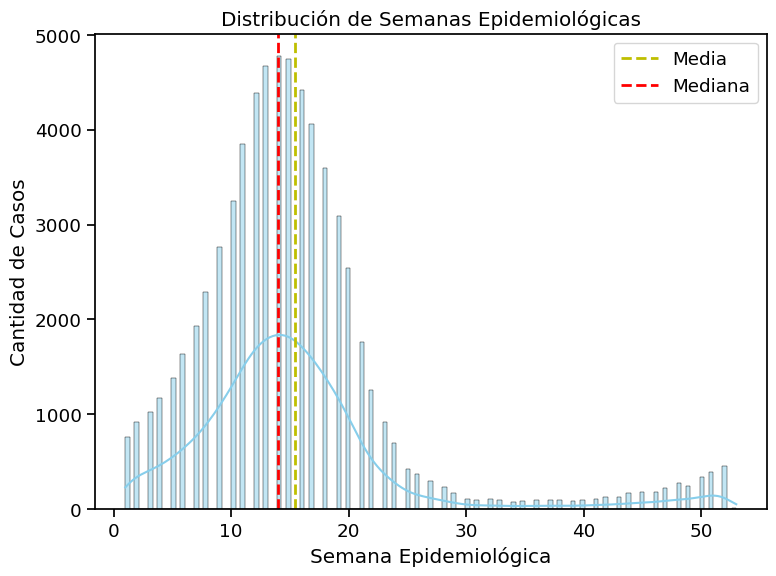

In [195]:
fig, ax = plt.subplots(figsize=(8, 6))

# Calcular medidas estadísticas
media = df_filtrado['semanas_epidemiologicas'].mean()
mediana = df_filtrado['semanas_epidemiologicas'].median()

# Graficar el histograma con KDE
sns.histplot(df_filtrado['semanas_epidemiologicas'], kde=True, ax=ax, color='skyblue', edgecolor='black')

# Agregar líneas de Media, Mediana y Moda
ax.axvline(media, color='y', linestyle='dashed', linewidth=2, label='Media')
ax.axvline(mediana, color='r', linestyle='dashed', linewidth=2, label='Mediana')

# Configuración del gráfico
ax.set_title('Distribución de Semanas Epidemiológicas')
ax.set_xlabel('Semana Epidemiológica')
ax.set_ylabel('Cantidad de Casos')
ax.legend()  # Mostrar leyenda

# Ajustar diseño
fig.tight_layout()

# Mostrar el gráfico
plt.show()


### Relación Conjunta
Del Análisis obtenido de las dos variables anteriores, podemos decir que la cantidad_casos se encuentra vinculado al comportamiento de la edad de las personas, o sea a la variable grupo_edad_id y a la semanas_epidemiológicas. Por lo tanto podemos realizar una gráfica de estas tres variables de la siguiente manera.

In [196]:
# Agrupar los datos por 'grupo_edad_id' y 'semana_epidemiologica', sumando 'cantidad_casos'
data_grouped = df_filtrado[df_filtrado['grupo_edad_id'] <= 13] .groupby(['grupo_edad_id', 'semanas_epidemiologicas'])['cantidad_casos'].sum().reset_index()
print(data_grouped)

     grupo_edad_id  semanas_epidemiologicas  cantidad_casos
0                0                       18             2.0
1                1                        1             2.0
2                1                        2             5.0
3                1                        3             2.0
4                1                        4             3.0
..             ...                      ...             ...
606             13                       20            39.0
607             13                       21            32.0
608             13                       22            23.0
609             13                       23            14.0
610             13                       24            45.0

[611 rows x 3 columns]


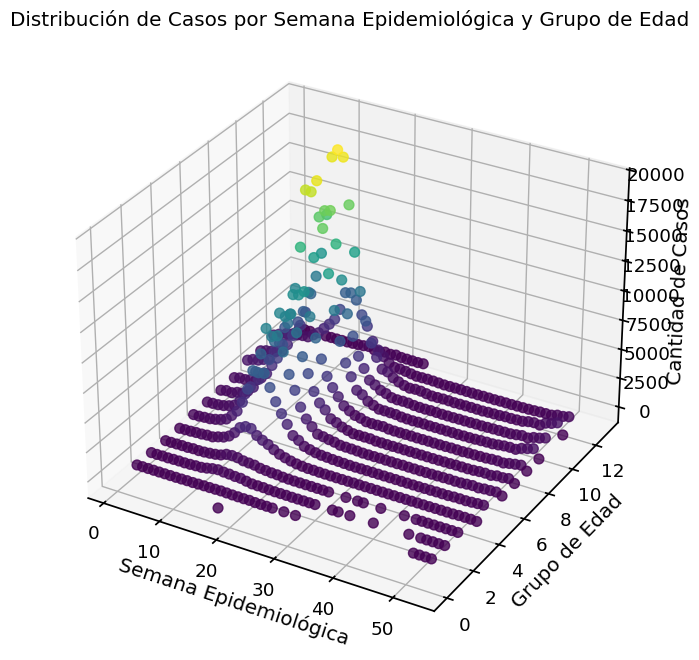

In [197]:
from mpl_toolkits.mplot3d import Axes3D

# Extraer valores para los ejes
x = data_grouped['semanas_epidemiologicas']   # Eje X: Semanas epidemiológicas
y = data_grouped['grupo_edad_id']           # Eje Y: Grupo de edad
z = data_grouped['cantidad_casos']          # Eje Z: Cantidad de casos

# Crear figura en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar puntos en 3D
ax.scatter(x, y, z, c=z, cmap='viridis', s=50, alpha=0.8)

# Etiquetas de ejes
ax.set_xlabel('Semana Epidemiológica')
ax.set_ylabel('Grupo de Edad')
ax.set_zlabel('Cantidad de Casos')
ax.set_title('Distribución de Casos por Semana Epidemiológica y Grupo de Edad')

plt.show()


## Análisis de Outlier- Función de Probabilidad de PANDEMIA

Al comienzo de este documento, se realizo diagramas boxplot comparativos de la cantidad_casos para los diferentes años, dejando establecido la cantidad importante de datos anómalos o outlier. Veamos esa grafica de manera amplificada para entender su comportamiento.

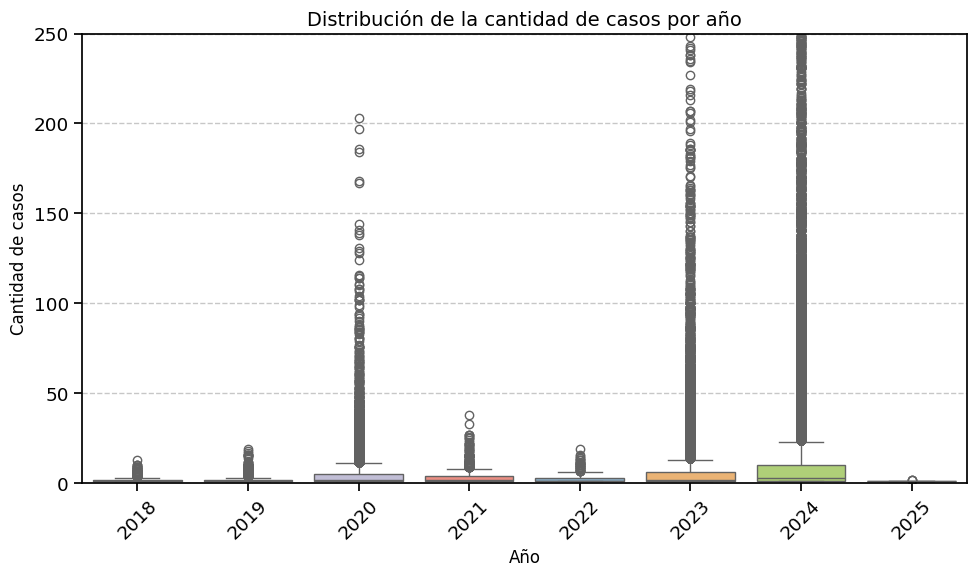

In [198]:
# Crear el boxplot comparativo
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtrado, x='anio', y='cantidad_casos', palette="Set3")

# Personalizar la gráfica
plt.title('Distribución de la cantidad de casos por año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de casos', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 250)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


1.  Esta gráfica nos indica que los años que hubieron pandemia, como son el 2020, 2023 y 2024; se registraron valoresatípicos (es decir,en baja proporción) en la variable cantidad_casos, por valores superior a 200 casos reportados de contagios por semana y por localidad.


2.  Por lo tanto realizando un HISTOGRAMA del comportamiento de los valores para la variable cantidad_casos, podremos observar el alcanse o rango de valores presentes, además de la cantidad de ocurrencia de dichos valores.

3. Por otro lado ello nos habla de una probabilidad. Si realizamos la gráfica de la FUNCIÓN DE DENSIDAD DE PROBABILIDAD, PODREMOS OBSERVAR QUE DICHA VARIABLES  cantidad_casos  PRESENTA UNA DISTRIBUCIÓN EXPONENCIAL DECRECIENTE.  Con esta podemos graficar su FUNCIÓN DE PROBABILIDAD ACUMULADA.

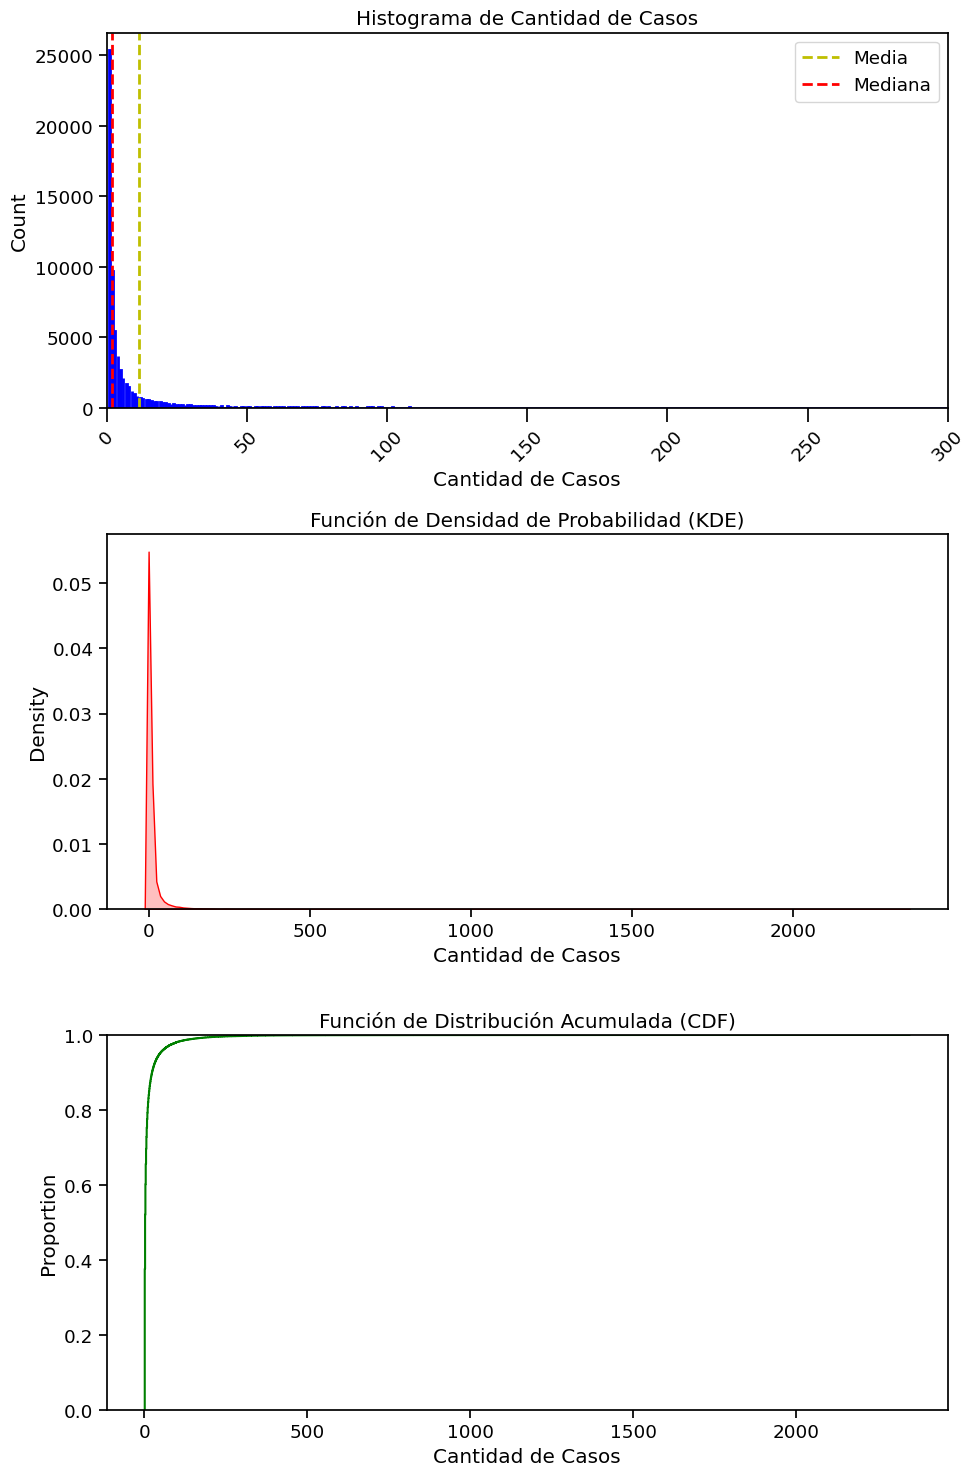

In [199]:
# Crear la figura y subgráficos con 3 filas y 1 columna
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Establecer el límite máximo para el eje X (450 o el máximo en los datos)
M = min(df_filtrado['cantidad_casos'].max(), 300)

# Calcular valores de tendencia central
media = df_filtrado['cantidad_casos'].mean()
mediana = df_filtrado['cantidad_casos'].median()

# Histograma con líneas de tendencia central
sns.histplot(df_filtrado['cantidad_casos'], color='cyan', edgecolor='blue', linewidth=2, ax=axs[0])
axs[0].set_xlim(0, M)
axs[0].set_xlabel('Cantidad de Casos')
axs[0].set_title('Histograma de Cantidad de Casos')
axs[0].tick_params(axis='x', rotation=45, size=10)

# Líneas de Media y Mediana
axs[0].axvline(media, color='y', linestyle='dashed', linewidth=2, label='Media')
axs[0].axvline(mediana, color='r', linestyle='dashed', linewidth=2, label='Mediana')

# Mostrar la leyenda en el histograma
axs[0].legend()

# Gráfico de Densidad de Probabilidad (KDE)
sns.kdeplot(df_filtrado['cantidad_casos'], color='red', fill=True, ax=axs[1])
axs[1].set_xlabel('Cantidad de Casos')
axs[1].set_title('Función de Densidad de Probabilidad (KDE)')

# Gráfico de Distribución Acumulada (CDF)
sns.ecdfplot(df_filtrado['cantidad_casos'], color='green', ax=axs[2])
axs[2].set_xlabel('Cantidad de Casos')
axs[2].set_title('Función de Distribución Acumulada (CDF)')

# Ajustar el diseño de las subtramas para mejor visualización
plt.tight_layout()

# Mostrar los gráficos
plt.show()


Para verificar que las gráficas anteriores son validas y que nuestra base de datos registra valores en cantidad_casos superiores a 2000, mostremos cuales son esos registros y que cantidades se repiten.

In [200]:
y = df_filtrado['cantidad_casos'].loc[df_filtrado['cantidad_casos'] >50].value_counts()
print(f'la cantidad de datos en la variable cantidad_casos mayor a 50 es: {y.shape[0]}\n \n')
print(f'la siguiente tabla muestra los valores en cantidad_casos y la cantidad de ocurrencias.\n \n ')
display(y.sort_index())

la cantidad de datos en la variable cantidad_casos mayor a 50 es: 376
 

la siguiente tabla muestra los valores en cantidad_casos y la cantidad de ocurrencias.
 
 


,count
cantidad_casos,
51.0,60
52.0,68
53.0,67
54.0,54
55.0,54
...,...
1787.0,1
1934.0,1
1939.0,1


verifiquemos los valores donde la variables cantidad_casos es superior al valor 1070.

In [201]:
x = df_filtrado.loc[df_filtrado['cantidad_casos'] > 1070]
display(x)

,departamento_id,departamento_nombre,provincia_id,provincia_nombre,anio,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
41763,14,Capital,14,Córdoba,2024,12,Dengue,10,De 35 a 44 años,1344.0
42651,14,Capital,14,Córdoba,2024,12,Dengue,6,De 10 a 14 años,1193.0
42966,14,Capital,14,Córdoba,2024,14,Dengue,6,De 10 a 14 años,1216.0
43085,14,Capital,14,Córdoba,2024,12,Dengue,9,De 25 a 34 años,1939.0
43359,14,Capital,14,Córdoba,2024,13,Dengue,11,De 45 a 65 años,1934.0
43442,14,Capital,14,Córdoba,2024,14,Dengue,10,De 35 a 44 años,1645.0
43550,14,Capital,14,Córdoba,2024,14,Dengue,9,De 25 a 34 años,2349.0
43696,14,Capital,14,Córdoba,2024,13,Dengue,10,De 35 a 44 años,1544.0
43711,14,Capital,14,Córdoba,2024,14,Dengue,8,De 20 a 24 años,1244.0
43854,14,Capital,14,Córdoba,2024,14,Dengue,11,De 45 a 65 años,2102.0


## Conclusiones
1. **¿ Podemos establecer alguna relación o tendencia de la enfermedad del dengue segun region geográfica, estación del año o edad de la población?**
- De acuerdo a los resultados anteriores y al comportamiento funcional de las variables de semanas_epidemiológicas, grupo_edad_id y cantidad_casos podemos encontrar una claro comportamiento de la situación sanitaria con respepecto al Dengue y Sika. También el análisis permite ver la cantidad de casos para las diferenetes provincias.

2. **¿ Existe algún parametro que nos indique si estamos frente a una pandemia o no?**
- De acuerdo al estudio del comportamiento de la variable cantidad_casos se logro encontrar una función de probabilidad la cual refleja si estamos frente a una pandemia o no y  con que grado de certeza.

3. **¿ Cuál es la relevancia o impacto de estos resultados?**
- Conocer el comportaiento de la situación sanitaria frente a esta enfermedad y sus posibles esenarios de riesgos posibilita gestionar de manera adecuada y eficiente recursos en prevención y mitigación de esta enfermedad.



## Descarga del Dataset Actualizado y Depurado

La base de datos obtenida de este análisis y depuración de la información puede ser exportada a formato excel y descargada a través del siguiente código.

In [202]:
# Exportar a un archivo Excel
df_filtrado.to_excel("datos_dengue_actualizados.xlsx", index=False)

print("Archivo Excel generado exitosamente.")

Archivo Excel generado exitosamente.


In [203]:
from google.colab import files
files.download("datos_dengue_actualizados.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>